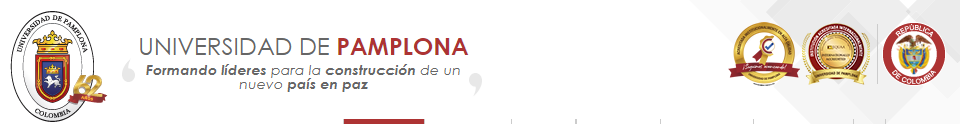
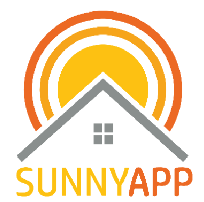

# Prueba de Ingreso SUNNY APP 
## Prueba de conocimiento en desarrollo de software
### Presentada por: Santiago Steven Puentes Gutiérrez - CC 1192713346
### Estudiante de Ingeniería Mecatrónica Universidad de Pamplona

El código implementa un proceso de transformación matemática para calcular las velocidades angulares de las ruedas 
de un robot móvil a partir de datos de velocidad lineal y angular. Utiliza programación orientada a objetos y divide 
las tareas en dos hilos para optimizar el rendimiento. Los resultados se exportan a un archivo y se pueden visualizar 
en gráficos para su análisis posterior.

Para garantizar el correcto funcionamiento del código es necesario implementar los comandos: "pip install numpy", este 
instala la biblioteca NumPy para operaciones numéricas avanzadas, y "pip install matplotlib" instala la biblioteca Matplotlib 
para crear gráficos y visualizaciones de datos.

In [1]:
pip install numpy


In [2]:
pip install matplotlib


Las líneas de código "import threading", "import numpy as np", y "import matplotlib.pyplot as plt" se encargan de importar 
las librerías necesarias para el funcionamiento del programa.Estas líneas importan las librerías de hilos, operaciones numéricas
y gráficas, respectivamente, que serán utilizadas en el código.

In [3]:
import threading
import numpy as np
import matplotlib.pyplot as plt

la clase 'Transformacion' encapsula los cálculos matemáticos necesarios para obtener las velocidades angulares de las ruedas del robot a partir de datos de velocidad lineal y angular en coordenadas cartesianas.

In [4]:
# Creamos una clase llamada 'Transformacion' para realizar ciertas operaciones matemáticas.
class Transformacion:
    def __init__(self):
        # Definimos algunos valores constantes para los ángulos y longitudes.
        self.Aiz = np.pi / 2
        self.Biz = np.pi
        self.Ade = -(np.pi / 2)
        self.Bde = 0
        self.l = 80  # Longitud entre las ruedas (mm)
        self.riz = 35  # Radio de la rueda izquierda (mm)
        self.rde = 35  # Radio de la rueda derecha (mm)

        # Calculamos una matriz 'J1' que se utilizará más adelante en los cálculos.
        self.J1 = np.array([[np.sin(self.Aiz + self.Biz), -np.cos(self.Aiz + self.Biz), -self.l * np.cos(self.Biz)],
                            [np.sin(self.Ade + self.Bde), -np.cos(self.Ade + self.Bde), -self.l * np.cos(self.Bde)]])

        # Calculamos la matriz inversa de 'J2' y la almacenamos para su uso posterior.
        self.J2_inv = np.array([[1 / self.riz, 0], [0, 1 / self.rde]])

    # Definimos una función para aplicar la primera transformación a las velocidades.
    def transformacion_1(self, v, w, theta):
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)

        # Creamos una matriz 'E1' de transformación para las velocidades.
        E1 = np.array([[cos_theta, sin_theta], [-sin_theta, cos_theta], [0, 1]])

        # Multiplicamos 'E1' con las velocidades (v, w) para obtener las velocidades transformadas.
        return np.dot(E1, np.array([v, w]))

    # Definimos una función para aplicar la segunda transformación a la matriz E1.
    def transformacion_2(self, E1, theta):
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)

        # Creamos una matriz 'Er' de transformación para E1.
        Er = np.array([[cos_theta, -sin_theta, 0], [-sin_theta, cos_theta, 0], [0, 0, 1]])

        # Multiplicamos 'Er' con E1 para obtener la matriz transformada.
        return np.dot(Er, E1)

    # Definimos una función para calcular Qiz y Qde a partir de la matriz Er.
    def calcular_Q(self, Er):
        # Aplicamos las matrices J1, Er y J2_inv para obtener los valores Qiz y Qde.
        return np.dot(np.dot(self.J1, Er), self.J2_inv)


La clase 'HiloOperaciones' hereda de 'threading.Thread' y se utiliza para realizar las operaciones matemáticas en un hilo separado. Al ser ejecutada, crea una instancia de la clase 'Transformacion' para realizar las transformaciones necesarias en los datos que recibe como entrada. Luego, itera sobre estos datos para calcular las velocidades angulares de las ruedas del robot utilizando los métodos de la clase 'Transformacion'. Los resultados se almacenan en la lista 'resultados'.

In [5]:
# Creamos una clase 'HiloOperaciones' que hereda de threading.Thread para realizar las operaciones en un hilo separado.
class HiloOperaciones(threading.Thread):
    def __init__(self, datos):
        threading.Thread.__init__(self)
        self.datos = datos
        self.resultados = []

    def run(self):
        # Creamos una instancia de la clase 'Transformacion' para realizar las operaciones.
        transformacion = Transformacion()

        # Iteramos sobre los datos y realizamos las transformaciones y cálculos.
        for dato in self.datos:
            t, theta, v, w = dato
            E1 = transformacion.transformacion_1(v, w, theta)
            Er = transformacion.transformacion_2(E1, theta)
            Qiz, Qde = transformacion.calcular_Q(Er)
            self.resultados.append((t, Qiz, Qde))



La clase 'HiloPrincipal' se encarga de importar datos desde un archivo de texto, procesarlos mediante la ejecución de operaciones matemáticas en un hilo secundario, y luego exportar los resultados y generar gráficos para visualizar las velocidades angulares de las ruedas izquierda y derecha de un robot móvil.

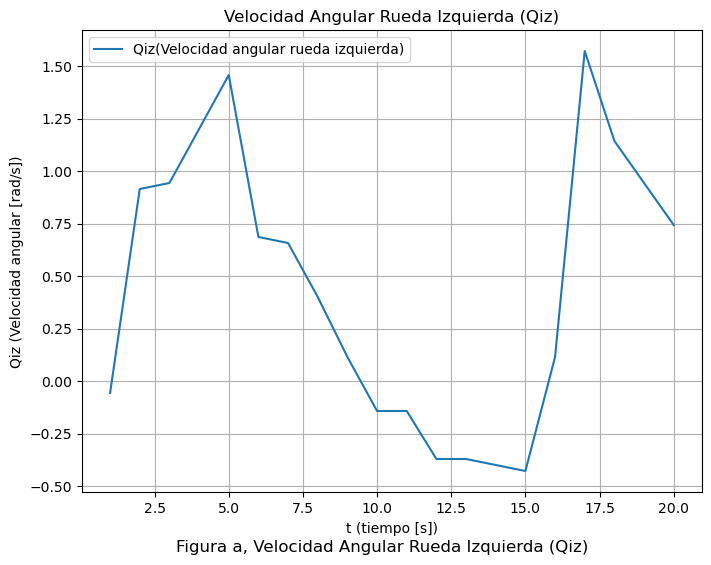

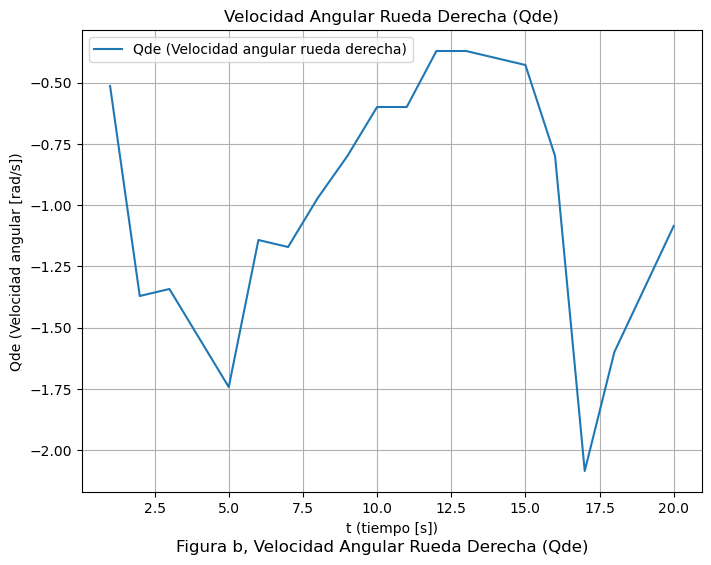

In [8]:
# Creamos una clase 'HiloPrincipal' que se encargará de importar, procesar y exportar los datos.
class HiloPrincipal:
    def __init__(self):
        self.datos = []

    def importar_datos(self, nombre_archivo):
        # Importamos los datos desde un archivo de texto y los almacenamos en una lista de tuplas.
        with open(nombre_archivo, 'r') as archivo:
            for linea in archivo:
                t, theta, v, w = map(float, linea.strip().split(','))
                self.datos.append((t, theta, v, w))

    def exportar_resultados(self, nombre_archivo):
        # Exportamos los resultados a un archivo de texto.
        with open(nombre_archivo, 'w') as archivo:
            archivo.write("t(tiempo [s]), Qiz(Velocidad angular rueda izquierda), Qde (velocidad angular rueda derecha)\n")
            for resultado in self.resultados:
                t, Qiz, Qde = resultado
                archivo.write(f"{t:.4f}, {Qiz:.4f}, {Qde:.4f}\n")

    def graficar_resultados(self):
        # Extraemos los valores de tiempo, Qiz y Qde para generar gráficos.
        tiempos = [resultado[0] for resultado in self.resultados]
        Qiz_values = [resultado[1] for resultado in self.resultados]
        Qde_values = [resultado[2] for resultado in self.resultados]

        # Graficamos los resultados de Qiz y Qde en función del tiempo.
        plt.figure(figsize=(8, 6))
        plt.plot(tiempos, Qiz_values, label='Qiz(Velocidad angular rueda izquierda)')
        plt.xlabel('t (tiempo [s])')
        plt.ylabel('Qiz (Velocidad angular [rad/s])')
        plt.legend()
        plt.grid(True)
        plt.title('Velocidad Angular Rueda Izquierda (Qiz)')
        plt.figtext(0.5, 0.01, "Figura a, Velocidad Angular Rueda Izquierda (Qiz)", ha="center", fontsize=12)
        plt.show()

        plt.figure(figsize=(8, 6))
        plt.plot(tiempos, Qde_values, label='Qde (Velocidad angular rueda derecha)')
        plt.xlabel('t (tiempo [s])')
        plt.ylabel('Qde (Velocidad angular [rad/s])')
        plt.legend()
        plt.grid(True)
        plt.title('Velocidad Angular Rueda Derecha (Qde)')
        plt.figtext(0.5, 0.01, "Figura b, Velocidad Angular Rueda Derecha (Qde)", ha="center", fontsize=12)
        plt.show()

    def ejecutar(self, nombre_archivo_entrada, nombre_archivo_salida):
        # Importamos los datos desde el archivo de entrada.
        self.importar_datos(nombre_archivo_entrada)

        # Ejecutamos las operaciones en un hilo secundario.
        hilo_operaciones = HiloOperaciones(self.datos)
        hilo_operaciones.start()
        hilo_operaciones.join()

        # Almacenamos los resultados calculados en la instancia principal.
        self.resultados = hilo_operaciones.resultados

        # Exportamos los resultados a un archivo de salida.
        self.exportar_resultados(nombre_archivo_salida)

        # Graficamos los resultados.
        self.graficar_resultados()


if __name__ == "__main__":
    # Creamos una instancia de 'HiloPrincipal' y ejecutamos el proceso con los archivos 'datos.txt' y 'resultado.txt'.
    hilo_principal = HiloPrincipal()
    hilo_principal.ejecutar("datos.txt", "resultado.txt")
